In [1]:
import os
os.chdir('/home/rn7823/fl_lab/centralized_cifar_10')
os.getcwd()

'/home/rn7823/fl_lab/centralized_cifar_10'

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('artifacts/MNIST_LeNet5_2024-09-06-23-52_19199830.csv')
df

,Round,train_losses,test_losses,accuracies,gradients
0,1,2.312605,0.002273,15.00,0.270014
1,2,2.272443,0.002239,23.72,0.327589
2,3,2.240681,0.002202,38.25,0.340066
3,4,2.220965,0.002161,47.77,0.356055
4,5,2.173102,0.002113,58.64,0.456330
...,...,...,...,...,...
4685,4686,0.002583,0.000055,98.15,0.094327
4686,4687,0.057753,0.000053,98.22,0.511741
4687,4688,0.001298,0.000052,98.21,0.049081
4688,4689,0.142371,0.000051,98.26,0.343135


In [5]:
df_sampled = df[df.index % 100 == 0]

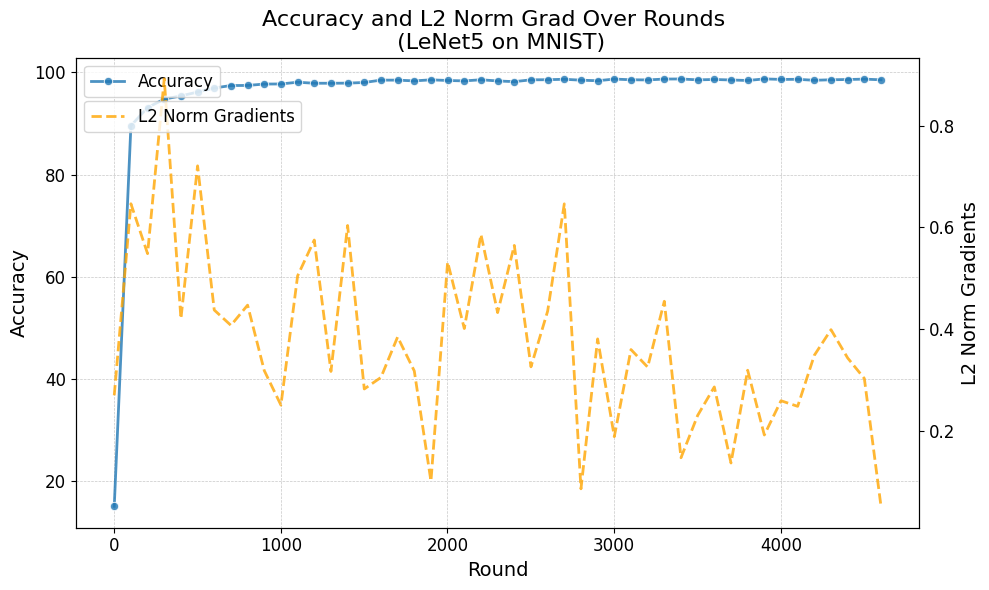

In [6]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for the first y-axis
sns.lineplot(data=df_sampled,
             x='Round',
             y='accuracies',
             ax=ax1,                   # Use the first axis
             linewidth=2,             # Line width
             marker='o',              # Marker style
             markersize=6,            # Marker size
             linestyle='-',           # Line style
             alpha=0.8,
             label='Accuracy')        # Add label for legend

# Configure the first y-axis
ax1.set_title('Accuracy and L2 Norm Grad Over Rounds \n (LeNet5 on MNIST)', fontsize=16)    # Title with font size
ax1.set_xlabel('Round', fontsize=14)                                      # X-axis label with font size
ax1.set_ylabel('Accuracy', fontsize=14)                                   # Y-axis label with font size
ax1.tick_params(axis='both', which='major', labelsize=12)                 # Improve tick appearance
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)   # Add gridlines

# Add legend for the first y-axis
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1.0), fontsize=12, frameon=True)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot data for the second y-axis
sns.lineplot(data=df_sampled,
             x='Round',
             y='gradients',  # Replace with the actual column name for the second y-axis
             ax=ax2,             # Use the second axis
             color='orange',     # Line color for the second y-axis
             linewidth=2,        # Line width
             linestyle='--',     # Line style
             alpha=0.8,
             label='L2 Norm Gradients')  # Add label for legend

# Configure the second y-axis
ax2.set_ylabel('L2 Norm Gradients', fontsize=14)  # Y-axis label for the second axis
ax2.tick_params(axis='y', which='major', labelsize=12)  # Improve tick appearance

# Add legend for the second y-axis (L2 Norm Gradients)
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.925), fontsize=12, frameon=True)


# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()
